In [1]:
import aniensemblestats as aes
import pandas as pd
import os

#import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format

In [2]:
#errdir = '/home/jujuman/Research/DataReductionMethods/model6r/error_compare/complete/'
errdir = '/home/jujuman/Research/DataReductionMethods/train_test/error_compare/'
#tex_store = "/home/jujuman/Dropbox/ANAKIN-ME-RESEARCH/PUBLICATION-ActiveLearning/tables/AllTests_results.tex"
tex_store = "/home/jujuman/Research/DataReductionMethods/train_test/tables/AllTests_results.tex"
efiles = [errdir+f for f in os.listdir(errdir)]
tsname = ['DrugBank',
          'Tripeptide',
          'GDB07to09',
          'MDBenchmark',
          'GDB10to13',
          's66x8',
         ]
for i in efiles:
    print(i)

/home/jujuman/Research/DataReductionMethods/train_test/error_compare/tsdata_ARC4.h5
/home/jujuman/Research/DataReductionMethods/train_test/error_compare/tsdata_ARC6.h5
/home/jujuman/Research/DataReductionMethods/train_test/error_compare/tsdata_ARC8.h5
/home/jujuman/Research/DataReductionMethods/train_test/error_compare/tsdata_ARC2.h5
/home/jujuman/Research/DataReductionMethods/train_test/error_compare/tsdata_ARC5.h5
/home/jujuman/Research/DataReductionMethods/train_test/error_compare/tsdata_ARC7.h5
/home/jujuman/Research/DataReductionMethods/train_test/error_compare/tsdata_ARC3.h5
/home/jujuman/Research/DataReductionMethods/train_test/error_compare/tsdata_ARC1.h5


In [3]:
eed = aes.evaluate_ensemble_data(efiles)
# Build latex document
header = r'\documentclass{article}'+'\n'+r'\usepackage{booktabs}'+'\n'+r'\usepackage[margin=1.0in]{geometry}'+'\n'+r'\begin{document}'+'\n'

begtab = r'\begin{table}'+'\n'+r'\centering'+'\n'+r'\tiny'+'\n'
endtab = r'\end{table}'+'\n'
enddoc = r'\end{document}'
styles = []
with open(tex_store, "w") as text_file:
    text_file.write(header)
    print('Stats for: Complete benchmark')
    etab = eed.get_totalerror_table()
    styles.append(etab.style)
    text_file.write(begtab+r'\caption{Data set: Complete benchmark}'+'\n'+etab.to_latex(escape=False)+endtab)

    for k in tsname:
        print('Stats for:',k)
        etab = eed.get_error_table(k)
        styles.append(etab.style)
        text_file.write(begtab+r'\caption{Data set: '+k+r'}'+'\n'+etab.to_latex(escape=False)+endtab)
    text_file.write(enddoc)
styles[0]

Stats for: Complete benchmark
Stats for: DrugBank
Stats for: Tripeptide
Stats for: GDB07to09
Stats for: MDBenchmark
Stats for: GDB10to13
Stats for: s66x8


,$\Delta$E$_\mathrm{MAE}$$\mu$,$\Delta$E$_\mathrm{MAE}$$\sigma$,$\Delta$E$_\mathrm{RMS}$$\mu$,$\Delta$E$_\mathrm{RMS}$$\sigma$,E$_\mathrm{MAE}$$\mu$,E$_\mathrm{MAE}$$\sigma$,E$_\mathrm{RMS}$$\mu$,E$_\mathrm{RMS}$$\sigma$,F$_\mathrm{MAE}$$\mu$,F$_\mathrm{MAE}$$\sigma$,F$_\mathrm{RMS}$$\mu$,F$_\mathrm{RMS}$$\sigma$
ARC1,1.976,0.0064466,3.00116,0.0225857,2.13042,0.0268264,3.20794,0.0952772,3.36079,0.0169218,5.47509,0.0451865
ARC2,1.97293,0.0101042,3.00203,0.0599852,2.1,0.0226885,3.14787,0.106345,3.36073,0.0256496,5.47246,0.138208
ARC3,1.92177,0.0272205,2.95253,0.0657593,2.0731,0.0449331,3.15124,0.216681,3.27332,0.0379423,5.36983,0.0592864
ARC4,1.90046,0.0130815,2.91653,0.0579278,2.04155,0.0300741,3.15743,0.206727,3.2378,0.0316299,5.43244,0.367369
ARC5,1.88497,0.0108953,2.89183,0.0734023,2.0151,0.0284683,3.17792,0.476755,3.22747,0.0163508,5.34406,0.370914
ARC6,1.85304,0.0367868,2.84402,0.0936815,1.97695,0.0236477,3.05626,0.151764,3.18277,0.0746968,5.28344,0.246961
ARC7,1.85982,0.0294111,2.8972,0.247427,1.98323,0.0680416,3.29036,0.926834,3.18463,0.0509986,5.41464,0.858867
ARC8,1.79116,0.0470309,2.78535,0.172844,1.91832,0.0763032,3.35309,0.784177,3.08787,0.0943055,5.2992,0.581555


In [5]:
print(eed.get_net_keys())
print(eed.get_size("9.0.5","MDBenchmark"))
#print(eed.get_size("9.0.4","Tripeptide"))
#print(eed.get_size("9.0.4","GDB07to09"))
#print(eed.get_size("9.0.4","GDB10to13"))

dict_keys(['ARC2', 'ARC7', 'ARC5', 'ARC4', 'ARC8', 'ARC3', 'ARC1', 'ARC6'])


KeyError: '9.0.5'

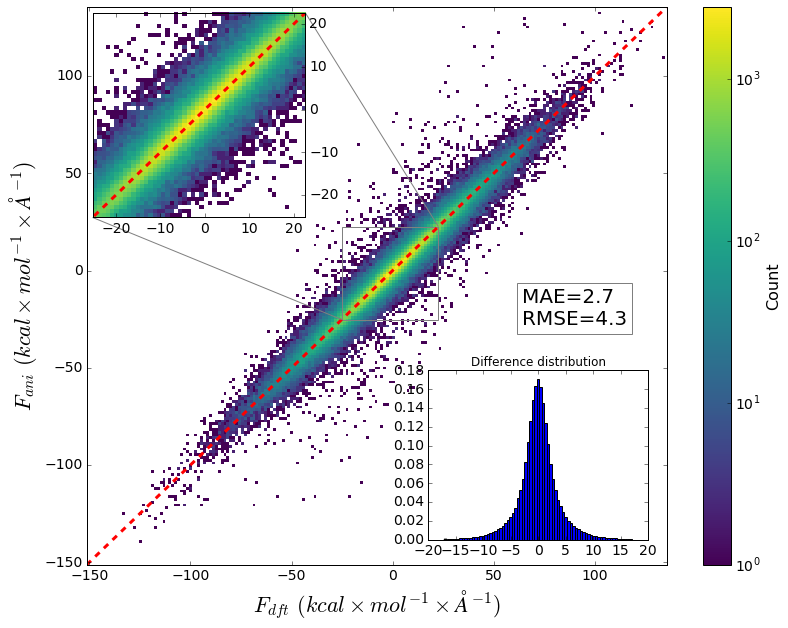

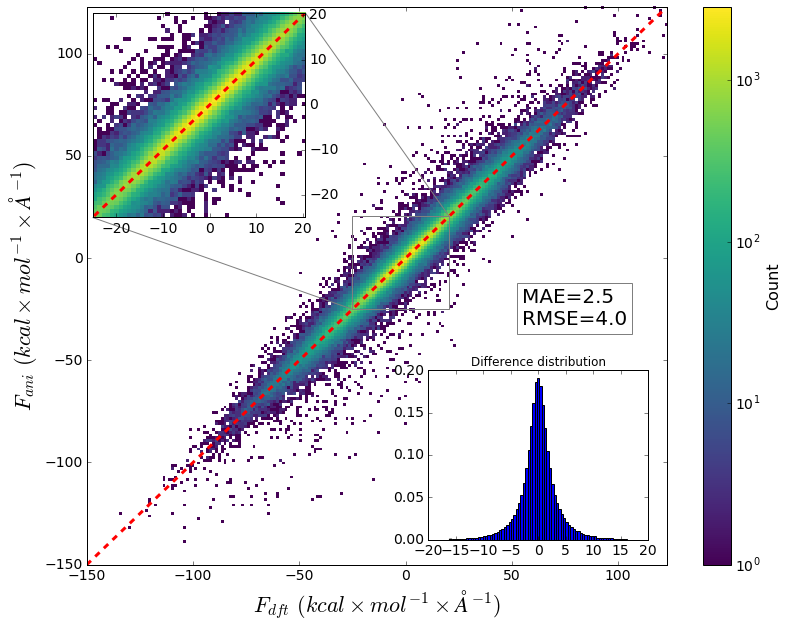

In [6]:
#eed.generate_correlation_plot('6.0.0','MDBenchmark','Fani','Fdft')
#eed.generate_correlation_plot('9.0.5','MDBenchmark','Fani','Fdft')
#eed.generate_correlation_plot('ANI-1','MDBenchmark','Fani','Fdft')
eed.generate_correlation_plot('ARC1','MDBenchmark','Fani','Fdft')
eed.generate_correlation_plot('ARC8','MDBenchmark','Fani','Fdft')

In [ ]:
#eed.plot_bar_propsbynet([('Total Energy',r'RMSE ($kcal \times mol^{-1}$)','Eani','Edft',[0.0,23.0]),
#                         ('Relative Energy',r'RMSE ($kcal \times mol^{-1}$)','dEani', 'dEdft',[0.0,12.0]),
#                         ('Force',r'RMSE ($kcal \times mol^{-1} \times \AA^{-1}$)','Fani', 'Fdft',[0.0,10.0])], 
#                         ['GDB07to09', 'GDB10to13', 'DrugBank', 'Tripeptide', 's66x8'],
#                         ntwks=['6.0.0','7.0.4','8.0.6','8.3.6','9.0.4','ANI-1'],
#                         fontsize=30, bbox_to_anchor=(0.3, 1.0), figsize=(40.0, 32.0), ncol=2, errortype='RMSE')

In [ ]:
eed.plot_error_by_net([(r'$E_T (kcal \times mol^{-1})$',r'RMSE ($kcal \times mol^{-1}$)','Eani','Edft'),
                       (r'$\Delta E (kcal \times mol^{-1})$',r'RMSE ($kcal \times mol^{-1}$)','dEani','dEdft'),
                       (r'$F (kcal \times mol^{-1}\AA^{-1})$',r'RMSE ($kcal \times mol^{-1}$)','Fani','Fdft'),], 
                         ['GDB07to09', 'GDB10to13', 'DrugBank', 'Tripeptide', 'MDBenchmark', 's66x8'],
                         ntwks=['6.0.0','6.2.4','7.0.4','8.0.5','8.3.4','9.0.4','9.0.5', 'ANI-1'],
                         fontsize=20, bbox_to_anchor=(1.0, 1.0), figsize=(30.0, 15.0), ncol=1, errortype='RMSE',
                        storepath='/home/jujuman/Dropbox/ANAKIN-ME-RESEARCH/PUBLICATION-ActiveLearning/Figures/figure_TSALvsANI_RMSE.pdf')

In [ ]:
eed.plot_error_by_net([(r'$E_T (kcal \times mol^{-1})$',r'RMSE ($kcal \times mol^{-1}$)','Eani','Edft'),
                       (r'$\Delta E (kcal \times mol^{-1})$',r'RMSE ($kcal \times mol^{-1}$)','dEani','dEdft'),
                       (r'$F (kcal \times mol^{-1}\AA^{-1})$',r'RMSE ($kcal \times mol^{-1}$)','Fani','Fdft'),], 
                         ['GDB07to09', 'GDB10to13', 'DrugBank', 'Tripeptide', 'MDBenchmark', 's66x8'],
                         ntwks=['6.0.0','6.2.4','7.0.4','8.0.5','8.3.4','9.0.4','9.0.5', 'ANI-1'],
                         fontsize=20, bbox_to_anchor=(1.0, 1.0), figsize=(30.0, 15.0), ncol=1, errortype='MAE',
                        storepath='/home/jujuman/Dropbox/ANAKIN-ME-RESEARCH/PUBLICATION-ActiveLearning/Figures/figure_TSALvsANI_MAE.pdf')
#eed.generate_violin_distribution('GDB10to13')

In [ ]:
'''
eed.plot_error_by_net([(r'$E_T (kcal \times mol^{-1})$',r'RMSE ($kcal \times mol^{-1}$)','Eani','Edft'),
                       (r'$\Delta E (kcal \times mol^{-1})$',r'RMSE ($kcal \times mol^{-1}$)','dEani','dEdft'),
                       (r'$F (kcal \times mol^{-1}\AA^{-1})$',r'RMSE ($kcal \times mol^{-1}$)','Fani','Fdft'),], 
                         ['GDB07to09', 'GDB10to13', 'DrugBank', 'Tripeptide', 'MDBenchmark', 's66x8'],
                         ntwks=['ARC1','ARC2','ARC3','ARC4','ARC5','ARC6','ARC7','ARC8'],
                        fontsize=20, bbox_to_anchor=(1.0, 1.0), figsize=(20.0, 30.0), ncol=1, errortype='RMSE',
                        storepath='/home/jujuman/Research/DataReductionMethods/train_test/tables/figure_TSALvsANI_RMSE.pdf')
'''